# Cyberbullying Classification
---

# Imports
---

In [1]:
import pandas as pd
import re
import nltk
import seaborn as sns
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


# Loading the Dataset
---

In [5]:
df = pd.read_csv('../data/cyberbullying_tweets.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          20000 non-null  object
 1   cyberbullying_type  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [6]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [7]:
df.tail()

,tweet_text,cyberbullying_type
19995,I am Christian who definitely does not support...,religion
19996,@yousufpoosuf @RKingLive2Dance @izrinhariri No...,religion
19997,How can you say Barack Obama was the best pres...,religion
19998,Another Mentally ill asylum seeker. WTHell do ...,religion
19999,shame on you. Bhagat singh did not kill innoce...,religion


In [8]:
df.shape

(20000, 2)

# Natural Language Processing
---

# 1. Data Cleaning

In [3]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    
    # Remove URLs, mentions, and hashtags from the text
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    
    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [10]:
df['processed_text'] = df['tweet_text'].apply(clean_text)

# 2. Feature Extraction

In [12]:
# Create the Bag of Words model
cv = CountVectorizer()
X = cv.fit_transform(df['processed_text']).toarray()
y = df['cyberbullying_type']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Classification Model
---

# 1. Logistic Regression Model

In [58]:
# train a Logistic Regression Model
clf = LogisticRegression(max_iter = 1000)

In [59]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 2. Predictions

In [60]:
# evaluate the classifier on the test set
y_pred = clf.predict(X_test)
y_pred

array(['gender', 'not_cyberbullying', 'gender', ..., 'religion', 'gender',
       'gender'], dtype=object)

# 3. Accuracy Score

In [61]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9116666666666666


# 4. Confusion Matrix

In [62]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2179,  258,    4],
       [ 125, 2197,   53],
       [  13,   77, 1094]], dtype=int64)

<Axes: >

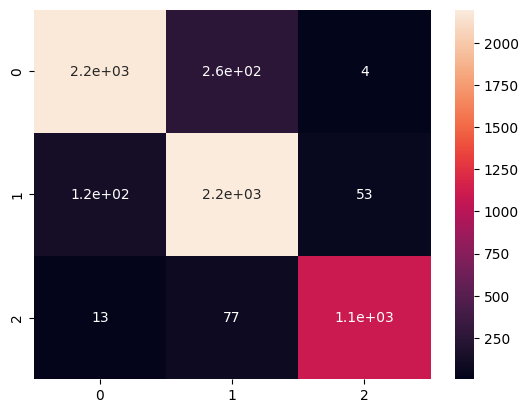

In [63]:
sns.heatmap(cm, annot=True)

# 5. Classification Report

In [64]:
report = classification_report(y_test, y_pred)
print(report)

                   precision    recall  f1-score   support

           gender       0.94      0.89      0.92      2441
not_cyberbullying       0.87      0.93      0.90      2375
         religion       0.95      0.92      0.94      1184

         accuracy                           0.91      6000
        macro avg       0.92      0.91      0.92      6000
     weighted avg       0.91      0.91      0.91      6000



Reference: https://www.kaggle.com/code/sujithmandala/cyberbullying-detection-nlp